# <center> Проект</center>
Перед началом выполнения проекта, необходимо изменить имя вашего ноутбука/ПК на вашу фамилию на английском языке (например: **Ivanov**). Затем <font color='red'> **обязательно выполнить код в ячейках ниже (их 4)**</font> (*в случае не выполнения, будут вычиляться 5 баллов из проекта*). В случае если модуль `datetime` не установлен нужно установить.

In [1]:
import os
os.getlogin()

'Ekaterina'

In [2]:
import socket
socket.gethostbyname(socket.gethostname())

'192.168.56.1'

In [3]:
!whoami

kaneva\ekaterina


In [4]:
from datetime import datetime

current_time = datetime.now()
print(current_time)
print("Kaneva E.P.") # написать здесь свою фамилию и инициалы

2022-12-27 18:36:40.501256
Kaneva E.P.


Скачайте таблицы в формате .csv из pgadmin и далее считайте данные таблицы.

### Предобработка данных для их изучения.

1.	Выведите по 5 строк из каждой таблицы.
2.	Выведите информацию о каждой таблице и изучите её (возможно есть какие-то странности). Опишите полученные данные.
3.	Проверьте данные на пропуски и дубликаты.
4.	Вычислите сводную (описательную) статистику о данных датафреймов (таблиц) и выведите её.
5.	Если в некоторых столбцах нужно изменить данные, измените их и аргументируйте зачем их стоит изменить (например, дата должна иметь тип данных `datetime64`, а не `object`).

### Задания:

1.	Найдите все параметры ПК, имеющих 8x или 40x CD и цену более 600. Отсортируйте по скорости и цене. 
2.	Для каждого производителя, выпускающего лаптопы c объёмом жесткого диска не менее 10 Гб и ОЗУ не менее 64 Мб, найти скорости таких лаптопов. Выведите производителей и скорость. *Нарисуйте график зависимости скоростей от полученных моделей ноутбуков.*
3.	Найдите номера моделей, тип и цены всех ноутбуков производителя А. Отсортируйте по убыванию цены. Постройте гистограмму изменения цены.
4.	Найдите производителя, номер модели и цену среди ноутбуков с наибольшей стоимостью до 1000. *Нарисуйте график зависимости цен от всех производителей ноутбуков.*
5.	Найдите для каждой модели ПК их количество, максимальное и минимальное ram, сгруппируйте по моделям. Переименуйте колонки макс. и мин. в “max/min_ram”.
6.	Проверьте гипотезу: «Самые дорогие ноутбуки у производителя А». Опишите полученный результат.
7.	Постройте матрицы корреляции для всех таблиц. Необязательно, но, если будет желание, нарисовать график тепловой карты матриц корреляции используя функцию heatmap из библиотеки seaborn.
8.	Нарисуйте график (*не графики, на одном графике должно отображаться всё*) зависимости цены ноутбука/ПК от объёма жесткого диска. Опишите ваши наблюдения, существует ли какая-то зависимость и т.п.
9.	Найдите:  
    a. Количество товаров каждого типа у каждого производителя. Постройте график pie, на котором должна отображаться доля каждого производителя.  
    b. Самый дорогой товар каждого типа, вывести тип и цену.  
    c. Производителей, делающих ноутбуки и ПК ценой более 600 долларов, но которые не производят принтеры, вывести производителя.
10.	Выведите новую цену каждого ноутбука и ПК получив её как модель+цена+ram. Дайте колонке название ‘strange_sum’.
11.	Найти производителей, делающих ноутбуки и ПК, но не принтеры.
12.	Найдите производителя ПК и модель, чья цена ниже средней цены ноутбука, а ram и скорость больше в 1.5 и 1.2 раза соответственно.
13.	Написать общий вывод о полученных результатах (какие важные закономерности были вами обнаружены или получены и т.п.).

In [1]:
import pandas as pd

# считываем данные таблицы
lp = pd.read_csv('laptop.csv', index_col = 0)
pc = pd.read_csv('pc.csv', index_col = 0)
pr = pd.read_csv('printer.csv', index_col = 0)
p = pd.read_csv('product.csv')

### Предобработка данных для их изучения.

1. Выведите по 5 строк с каждой таблицы.

In [2]:
# вывод первых 5 строк
lp.head()

,model,speed,ram,hd,price,screen
code,,,,,,
1,1298,350,32,4,700.0,11
2,1321,500,64,8,970.0,12
3,1750,750,128,12,1200.0,14
4,1298,600,64,10,1050.0,15
5,1752,750,128,10,1150.0,14


In [3]:
pc.head()

,model,speed,ram,hd,cd,price
code,,,,,,
1,1232,500,64,5,12x,600.0
10,1260,500,32,10,12x,350.0
11,1233,900,128,40,40x,980.0
12,1233,800,128,20,50x,970.0
2,1121,750,128,14,40x,850.0


In [4]:
pr.head()

,model,color,type,price
code,,,,
1,1276,n,Laser,400.0
2,1433,y,Jet,270.0
3,1434,y,Jet,290.0
4,1401,n,Matrix,150.0
5,1408,n,Matrix,270.0


In [5]:
p.head()

,maker,model,type
0,A,1232,PC
1,A,1233,PC
2,A,1276,Printer
3,A,1298,Laptop
4,A,1401,Printer


2. Выведите информацию о каждой таблице и изучите её (возможно есть какие-то странности). Опишите полученные данные.

In [6]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   6 non-null      int64  
 1   speed   6 non-null      int64  
 2   ram     6 non-null      int64  
 3   hd      6 non-null      int64  
 4   price   6 non-null      float64
 5   screen  6 non-null      int64  
dtypes: float64(1), int64(5)
memory usage: 336.0 bytes


In [7]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   12 non-null     int64  
 1   speed   12 non-null     int64  
 2   ram     12 non-null     int64  
 3   hd      12 non-null     int64  
 4   cd      12 non-null     object 
 5   price   12 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 672.0+ bytes


In [8]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   6 non-null      int64  
 1   color   6 non-null      object 
 2   type    6 non-null      object 
 3   price   6 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


In [9]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   16 non-null     object
 1   model   16 non-null     int64 
 2   type    16 non-null     object
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


Никаких странностей нет. Таблицы имеют общий столбец `model`, с помощью которого можно устанавливать связь между таблицей `p` (`product`) и остальными тремя.

3. Проверьте данные на пропуски и дубликаты.

In [10]:
# проверка на дубликаты
print(f'Дублкатов в "laptop.csv": {lp.duplicated().sum()}.')
print(f'Дублкатов в "pc.csv": {pc.duplicated().sum()}.')
print(f'Дублкатов в "printer.csv": {pr.duplicated().sum()}.')
print(f'Дублкатов в "product.csv": {p.duplicated().sum()}.')

Дублкатов в "laptop.csv": 0.
Дублкатов в "pc.csv": 0.
Дублкатов в "printer.csv": 0.
Дублкатов в "product.csv": 0.


In [11]:
# проверка на пропуски 
print(f'Пропусков в "laptop.csv": \n{lp.isna().sum()}.\n')
print(f'Пропусков в "pc.csv": \n{pc.isna().sum()}.\n')
print(f'Пропусков в "printer.csv": \n{pr.isna().sum()}.\n')
print(f'Пропусков в "product.csv": \n{p.isna().sum()}.\n')

Пропусков в "laptop.csv": 
model     0
speed     0
ram       0
hd        0
price     0
screen    0
dtype: int64.

Пропусков в "pc.csv": 
model    0
speed    0
ram      0
hd       0
cd       0
price    0
dtype: int64.

Пропусков в "printer.csv": 
model    0
color    0
type     0
price    0
dtype: int64.

Пропусков в "product.csv": 
maker    0
model    0
type     0
dtype: int64.



4.	Вычислите сводную (описательную) статистику о данных датафреймов (таблиц) и выведите ее.

In [12]:
# для lp (laptop.csv)
lp.describe()

,model,speed,ram,hd,price,screen
count,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,1452.833333,566.666667,80.000000,9.00000,1003.333333,13.000000
std,231.131492,163.299316,39.191836,2.75681,177.951304,1.549193
min,1298.000000,350.000000,32.000000,4.00000,700.000000,11.000000
25%,1298.000000,462.500000,64.000000,8.50000,955.000000,12.000000
50%,1309.500000,550.000000,64.000000,10.00000,1010.000000,13.000000
75%,1642.750000,712.500000,112.000000,10.00000,1125.000000,14.000000
max,1752.000000,750.000000,128.000000,12.00000,1200.000000,15.000000


In [13]:
# для pc (pc.csv)
pc.describe()

,model,speed,ram,hd,price
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1206.916667,608.333333,88.000000,13.666667,675.000000
std,52.397880,153.494645,43.417634,9.670323,261.342687
min,1121.000000,450.000000,32.000000,5.000000,350.000000
25%,1204.250000,500.000000,56.000000,8.000000,387.500000
50%,1232.000000,550.000000,96.000000,10.000000,725.000000
75%,1233.000000,750.000000,128.000000,15.500000,875.000000
max,1260.000000,900.000000,128.000000,40.000000,980.000000


In [14]:
# для pr (printer.csv)
pr.describe()

,model,price
count,6.000000,6.000000
mean,1373.333333,296.666667
std,72.060160,94.162979
min,1276.000000,150.000000
25%,1316.250000,270.000000
50%,1404.500000,280.000000
75%,1426.750000,372.500000
max,1434.000000,400.000000


In [15]:
# для p (product.csv)
p.describe()

,model
count,16.000000
mean,1464.500000
std,305.022622
min,1121.000000
25%,1272.000000
50%,1361.000000
75%,1513.000000
max,2113.000000


Можем заметить, что стоимость ноутбуков в среднем выше стоимости ПК, которая, в свою очередь, выше стоимости принтеров. У ПК и ноутбуков больше характеристик.

5.	Если в некоторых столбцах нужно изменить данные, измените их и аргументируйте зачем их стоит изменить (например, дата должна иметь тип данных datetime64, а не object).

В датафрейме `pr` тип столбца `color` можно сменить с `object` на `bool`, т. к. присутствуют только 2 значения, которые логично заменить на логический тип - `y` (цветной принтер, `y` $\rightarrow$ `True`) и `n` (ч/б принтер, `n` $\rightarrow$ `False`).  
Остальные типы данных соответствуют содержимому.

In [16]:
pr['color'] = pr['color'].apply(lambda x: True if x == 'y' else False)
pr.dtypes

model      int64
color       bool
type      object
price    float64
dtype: object

In [17]:
pr.head()

,model,color,type,price
code,,,,
1,1276,False,Laser,400.0
2,1433,True,Jet,270.0
3,1434,True,Jet,290.0
4,1401,False,Matrix,150.0
5,1408,False,Matrix,270.0


### Задания.

1. Найдите все параметры ПК, имеющих 8x или 40x CD и цену более 600. Отсортируйте по скорости и цене.

In [18]:
pc[(pc['price'] > 600) & ((pc['cd'] == '40x') | (pc['cd'] == '8x'))].sort_values(['speed', 'price'])

,model,speed,ram,hd,cd,price
code,,,,,,
4,1121,600,128,14,40x,850.0
5,1121,600,128,8,40x,850.0
2,1121,750,128,14,40x,850.0
11,1233,900,128,40,40x,980.0


2. Для каждого производителя, выпускающего лаптопы c объёмом жесткого диска не менее 10 Гб и ОЗУ не менее 64 Мб, найти скорости таких лаптопов. Выведите производителей и скорость. *Нарисуйте график зависимости скоростей от полученных моделей ноутбуков.*

In [19]:
lp_p = pd.merge(lp, p, how = 'left', on = 'model') 

lp_p_df = lp_p[(lp_p['hd'] >= 10) & (lp_p['ram'] >= 64)] 
lp_p_df_1 = lp_p_df[['maker', 'speed']]
lp_p_df_1

,maker,speed
2,B,750
3,A,600
4,A,750
5,A,450


<AxesSubplot:title={'center':'График зависимости скорости ноутбуков от моделей'}, xlabel='Модель', ylabel='Скорость'>

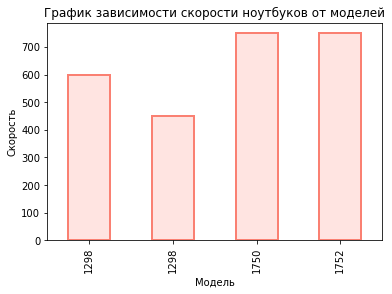

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

lp_p_df = lp_p_df.sort_values('model') 
lp_p_df.plot.bar(x = 'model',
                 y = 'speed', 
                 xlabel = 'Модель',
                 ylabel = 'Скорость', 
                 title = "График зависимости скорости ноутбуков от моделей", 
                 color = 'mistyrose', 
                 edgecolor = 'salmon', 
                 linewidth = 2,
                 legend = False)

Одни модели могут иметь различную скорость (различные вариации). В общем скорость варьируется от ~350 до ~750.

3.	Найдите номера моделей, тип и цены всех ноутбуков производителя А. Отсортируйте по убыванию цены. Постройте гистограмму изменения цены.

In [21]:
lp_p_maker_A = lp_p[lp_p['maker'] == 'A']
lp_p_maker_A = lp_p_maker_A[['maker', 'model', 'type', 'price']]
lp_p_maker_A = lp_p_maker_A.sort_values('price', ascending = False) 
lp_p_maker_A

,maker,model,type,price
4,A,1752,Laptop,1150.0
3,A,1298,Laptop,1050.0
5,A,1298,Laptop,950.0
0,A,1298,Laptop,700.0


<AxesSubplot:title={'center':'График стоимости моделей ноутбуков производителя А'}, xlabel='Модель', ylabel='Стоимость'>

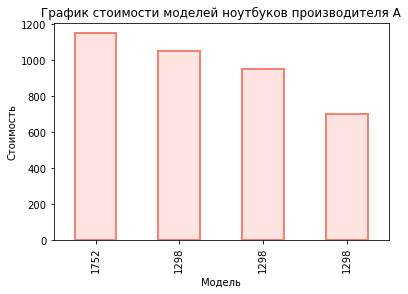

In [22]:
lp_p_maker_A.plot.bar(x = 'model', 
                      y = 'price', 
                      xlabel = 'Модель', 
                      ylabel = 'Стоимость', 
                      title = "График стоимости моделей ноутбуков производителя А", 
                      color = 'mistyrose',
                      edgecolor = 'salmon',
                      linewidth = 2,
                      legend = False)

Производитель А производит только 2 различные модели, при этом вариации есть только у одной из них (1298). Модель 1298 более бюджетная (в среднем) по сравнению с моделью 1752.

4.	Найдите производителя, номер модели и цену среди ноутбуков с наибольшей стоимостью до 1000; *Нарисуйте график зависимости цен от всех производителей ноутбуков.*

In [23]:
lp_p_price_under_1000 = lp_p[lp_p['price'] < 1000] 
lp_p_price_under_1000 = lp_p_price_under_1000[['maker', 'model', 'price']] 
lp_p_price_under_1000

,maker,model,price
0,A,1298,700.0
1,C,1321,970.0
5,A,1298,950.0


<AxesSubplot:title={'center':'График зависимости стоимости ноутбуков от производителя'}, xlabel='Производитель', ylabel='Стоимость'>

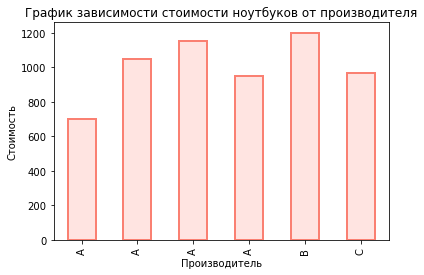

In [24]:
lp_p = lp_p.sort_values('maker')

lp_p.plot.bar(x = 'maker',
              y = 'price',
              xlabel = 'Производитель',
              ylabel = 'Стоимость',
              title = "График зависимости стоимости ноутбуков от производителя",
              color = 'mistyrose',
              edgecolor = 'salmon',
              linewidth = 2,
              legend = False)

Заметно, что у производителя А есть модель с самой низкой стоимостью из представленных, у В с самой высокой. Производитель А более бюджетный в среднем, чем В, и примерно одинаковен с С.

5.	Найдите для каждой модели ПК их количество и максимальное и минимальное ram, сгруппируйте по моделям; переименуйте колонки макс. и мин. в “max/min_ram”.

In [25]:
# считаем количество для каждой модели и делаем из этого датафрейм
pc_models = pc['model']
pc_models_number = pc_models.value_counts()
pc_models_number = pd.DataFrame(pc_models_number)
pc_models_number.sort_index()

# переименовываем колонки (колонку индексов в model, колонку количеств в number)
columns = list(pc_models_number.columns)
columns[0] = 'number'
pc_models_number.columns = columns
pc_models_number.index.name = 'model'

# находим макс и мин ram для каждой модели
pc_ram = pd.pivot_table(pc,
                       index = 'model',
                       values = 'ram',
                       aggfunc = [min, max])

# переименовываем колонки таблицы выше, чтобы названия были не двухуровневые
columns = list(pc_ram.columns)
columns[0] = 'min'
columns[1] = 'max'
pc_ram.columns = columns

# мёржим
pc_models_ram = pd.merge(pc_models_number,
                        pc_ram,
                        on = 'model')

# переименования по требованиям
columns = list(pc_models_ram.columns)
columns[1] = 'min_ram'
columns[2] = 'max_ram'
pc_models_ram.columns = columns

pc_models_ram

,number,min_ram,max_ram
model,,,
1232,4,32,64
1233,4,64,128
1121,3,128,128
1260,1,32,32


6.	Проверьте гипотезу: «Самые дорогие ноутбуки у производителя А». Опишите полученный результат.

In [26]:
lp_p_price = pd.pivot_table(lp_p,
                           index = 'maker',
                           values = 'price',
                           aggfunc = [min, max, np.mean, np.median])

lp_p_price

,min,max,mean,median
,price,price,price,price
maker,,,,
A,700.0,1150.0,962.5,1000.0
B,1200.0,1200.0,1200.0,1200.0
C,970.0,970.0,970.0,970.0


Из полученных значений видим, что и медианная (колонка `median`), и средняя (колонка `mean`) стоимость ноутбуков производителя А ниже, чем у производителя B, но выше, чем у производителя C. Более того, максимальная (колонка `max`) стоимость ноутбуков производителя А ниже, чем максимальная стоимость ноутбуков производителя В. **Таким образом, гипотеза "Самые дорогие ноутбуки у производителя А" неверна.** Самые дорогие ноутбуки у производителя В (хотя выборка очень небольшая, поэтому с уверенностью так говорить нельзя в общем, только для представленных моделей).

7.	Постройте матрицы корреляции для всех таблиц. Необязательно, но, если будет желание, нарисовать график тепловой карты матриц корреляции используя функцию heatmap из библиотеки seaborn.

In [27]:
# матрица для pc
pc.corr()

,model,speed,ram,hd,price
model,1.000000,-0.185278,-0.591091,0.086596,-0.441972
speed,-0.185278,1.000000,0.818463,0.859476,0.884962
ram,-0.591091,0.818463,1.000000,0.547365,0.955008
hd,0.086596,0.859476,0.547365,1.000000,0.622303
price,-0.441972,0.884962,0.955008,0.622303,1.000000


Заметно, что в основном скорость тесно связана с остальными характеристиками, стоимость тесно связана с ОЗУ и скоростью.

In [28]:
# матрица для laptop
lp.corr()

,model,speed,ram,hd,price,screen
model,1.000000,0.872024,0.952037,0.560904,0.752311,0.493203
speed,0.872024,1.000000,0.950000,0.799671,0.954369,0.830098
ram,0.952037,0.950000,1.000000,0.770054,0.908486,0.632456
hd,0.560904,0.799671,0.770054,1.000000,0.929516,0.749269
price,0.752311,0.954369,0.908486,0.929516,1.000000,0.819788
screen,0.493203,0.830098,0.632456,0.749269,0.819788,1.000000


Заметно, что в основном скорость и ОЗУ тесно связаны с остальными характеристиками, стоимость тесно связана с ОЗУ, ПЗУ, скоростью и размером экрана.

In [29]:
# матрица для printer
pr.corr()

,model,color,price
model,1.000000,0.646750,-0.762028
color,0.646750,1.000000,-0.137102
price,-0.762028,-0.137102,1.000000


Здесь сильно закономерностей выявить нельзя, единственное - стоимость, на удивление, не сильно зависит от того, цветной принтер или нет.

In [30]:
# бесполезная матрица, но пусть будет
p.corr()

,model
model,1.0


<AxesSubplot:>

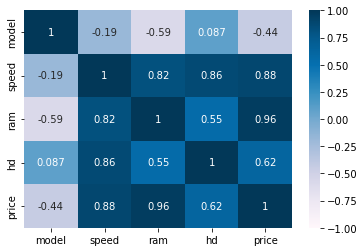

In [31]:
import seaborn as sbs

# матрица для pc
sbs.heatmap(pc.corr(), 
            annot = True,
            fmt = '.2g',
            vmin = -1, 
            vmax = 1, 
            center = 0,
            cmap = 'PuBu')

Более наглядное представление той же информации, что в матрице, поэтому новых выводов тут не сделать.

<AxesSubplot:>

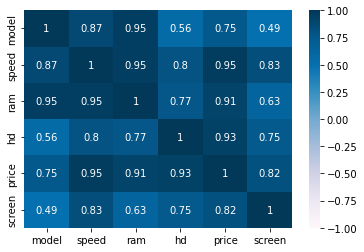

In [32]:
# матрица для laptop
sbs.heatmap(lp.corr(), 
            annot = True,
            fmt = '.2g',
            vmin = -1, 
            vmax = 1, 
            center = 0,
            cmap = 'PuBu')

Более наглядное представление той же информации, что в матрице, поэтому новых выводов тут не сделать.

<AxesSubplot:>

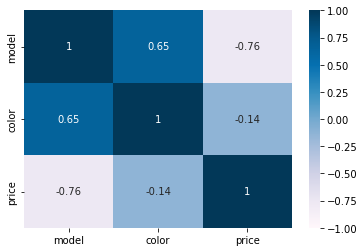

In [33]:
# матрица для printer
sbs.heatmap(pr.corr(), 
            annot = True,
            fmt = '.2g',
            vmin = -1, 
            vmax = 1, 
            center = 0,
            cmap = 'PuBu')

Более наглядное представление той же информации, что в матрице, поэтому новых выводов тут не сделать.

8.	Нарисуйте график (*не графики, на одном графике должно отображаться всё*) зависимости цены ноутбука/ПК от объёма жесткого диска. Опишите ваши наблюдения, существует ли какая-то зависимость и т.п.


Text(0.5, 1.0, 'График зависимости стоимости ноутбуков/ПК от объёма жёсткого диска')

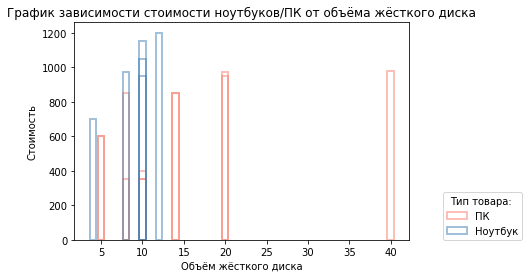

In [34]:
pc_price = pc[['hd', 'price']].sort_values(['hd', 'price'])
lp_price = lp[['hd', 'price']].sort_values(['hd', 'price'])

x1 = pc_price['hd']
y1 = pc_price['price']
x2 = lp_price['hd']
y2 = lp_price['price']

pc_8 = plt.bar(x1, y1, color = 'None', edgecolor = 'salmon', linewidth = 2, alpha = 0.5)
lp_8 = plt.bar(x2, y2, color = 'None', edgecolor = 'steelblue', linewidth = 2, alpha = 0.5)

plt.xlabel('Объём жёсткого диска')
plt.ylabel('Стоимость')
plt.legend((pc_8, lp_8), ['ПК', 'Ноутбук'], title = 'Тип товара: ', loc = (1.1, 0))
plt.title('График зависимости стоимости ноутбуков/ПК от объёма жёсткого диска')

В основном видим, что чем больше объём жёсткого диска у ноутбука/ПК, тем выше цена, однако эта зависимость нелинейная и не всегда верна для частных рассматриваемых моделей.

9.	Найдите:  
    a.	количество товаров каждого типа у каждого производителя; постройте график pie, на котором должна отображаться доля каждого производителя.  
    b.	самый дорогой товар каждого типа, вывести тип и цену.  
    c.	производителей, делающих ноутбуки и пк ценой более 600 долларов, но которые не производят принтеры, вывести производителя.

In [35]:
# a

# функция для переименования столбцов
def rename_columns(p_df_maker_number, subject):
    columns = list(p_df_maker_number.columns)
    columns[0] = subject
    p_df_maker_number.columns = columns
    p_df_maker_number.index.name = 'maker'

# количество для ПК
p_pc = pd.merge(pc, p, how = 'left', on = 'model')
p_pc_maker = p_pc['maker']
p_pc_maker_number = p_pc_maker.value_counts()
p_pc_maker_number = pd.DataFrame(p_pc_maker_number)
rename_columns(p_pc_maker_number, 'ПК')

# количество для ноутбуков
p_lp = pd.merge(lp, p, how = 'left', on = 'model')
p_lp_maker = p_lp['maker']
p_lp_maker_number = p_lp_maker.value_counts()
p_lp_maker_number = pd.DataFrame(p_lp_maker_number)
rename_columns(p_lp_maker_number, 'Ноутбуки')

# количество для принтеров
p_pr = pd.merge(pr, p, how = 'left', on = 'model')
p_pr_maker = p_pr['maker']
p_pr_maker_number = p_pr_maker.value_counts()
p_pr_maker_number = pd.DataFrame(p_pr_maker_number)
rename_columns(p_pr_maker_number, 'Принтеры')

# merge 'em all
types_numbers = pd.merge(pd.merge(p_pc_maker_number,
                                  p_lp_maker_number,
                                  left_index = True, 
                                  right_index = True,
                                  how = 'outer'),
                         p_pr_maker_number,
                         left_index = True,
                         right_index = True,
                         how = 'outer')

# замена 'NaN' на 0
types_numbers = types_numbers.fillna(0)
types_numbers[['ПК', 'Ноутбуки', 'Принтеры']] = types_numbers[['ПК', 'Ноутбуки', 'Принтеры']].astype('int64')
types_numbers

,ПК,Ноутбуки,Принтеры
maker,,,
A,8,4,3
B,3,1,0
C,0,1,0
D,0,0,2
E,1,0,1


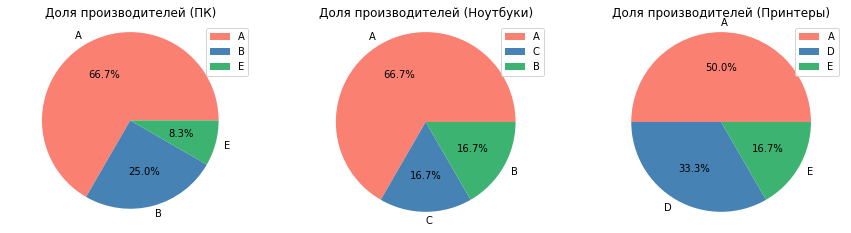

In [36]:
# размер фигуры
plt.figure(figsize = (15,8))

# функция для создания графика (DRY ради)
def create_pie(dataframe, subject):
    plt.pie(list(dataframe[subject]), 
            labels = list(dataframe.index), 
            autopct = '%1.1f%%', 
            colors = ['salmon', 'steelblue', 'mediumseagreen'])
    plt.axis('equal')
    plt.title(f"Доля производителей ({subject})")
    plt.legend()

# создание графиков
plt.subplot(2, 3, 1)
create_pie(p_pc_maker_number, 'ПК')
plt.subplot(2, 3, 2)
create_pie(p_lp_maker_number, 'Ноутбуки')
plt.subplot(2, 3, 3)
create_pie(p_pr_maker_number, 'Принтеры')

plt.show()

Производитель А самый широко представленный в каждой из категорий товаров, в то время как на оставшихся производителей приходится от трети до половины рынка суммарно. Каждую из категорий производят 3 производителя. Производитель D явно специализируется на принтерах и имеет там третью долю из преставленных (что весьма хорошо).

In [37]:
# b

# решаем проблему с двумя столбцами type в p_pr
columns = list(p_pr.columns)
columns[2] = 'printer_type'
columns[5] = 'type'
p_pr.columns = columns

# union всех трёх датафреймов
pc_lp_pr = p_pc.append(p_lp.append(p_pr))

maxprice = pd.pivot_table(pc_lp_pr,
                             index = 'type',
                             values = 'price',
                             aggfunc = max)

maxprice

,price
type,
Laptop,1200.0
PC,980.0
Printer,400.0


In [38]:
# c

# списки производителей ПК и лаптопов по отдельности
p_pc_above_600 = p_pc[p_pc['price'] > 600]
pc_makers_above_600 = list(p_pc_above_600['maker'])
p_lp_above_600 = p_lp[p_lp['price'] > 600]
lp_makers_above_600 = list(p_lp_above_600['maker'])
printer_makers = p[p['type'] == 'Printer']
printer_makers = list(printer_makers['maker'])

# все производители
all_makers = list(p['maker'].unique())

makers = []
i = 0
for maker in all_makers:
    if maker in pc_makers_above_600 and lp_makers_above_600: # and потому что нужны те, у которых и ПК, и ноутбуки
         if maker not in (printer_makers):
                makers.append(all_makers[i])
    i += 1

print("Производители ноутбуков и ПК ценой более 600 долларов, которые не производят принтеры: ", end = "")
for i in range(len(makers) - 1):
    print(makers[i], end = ", ")
print(makers[-1], end = '.')

Производители ноутбуков и ПК ценой более 600 долларов, которые не производят принтеры: B.

10.	Выведите новую цену каждого ноутбука и ПК получив её как модель+цена+ram. Дайте колонке название ‘strange_sum’.

In [39]:
# union pc и laptop
pc_and_lp = pc.append(lp)

strange_sum = []
for i in range(len(list(pc_and_lp.index))):
    strange_sum.append(pc_and_lp.iloc[i]['price'] + pc_and_lp.iloc[i]['model'] + pc_and_lp.iloc[i]['ram'])
    
pc_and_lp['strange_sum'] = strange_sum
pc_and_lp[['model', 'strange_sum']]

,model,strange_sum
code,,
1,1232,1896.0
10,1260,1642.0
11,1233,2341.0
12,1233,2331.0
2,1121,2099.0
3,1233,1897.0
4,1121,2099.0
5,1121,2099.0
6,1233,2311.0


11. Найти производителей, делающих ноутбуки и ПК, но не принтеры.

In [40]:
makers = []
i = 0
for maker in all_makers:
    if maker in list(p_pc['maker']) and list(p_lp['maker']):
         if maker not in (printer_makers):
                makers.append(all_makers[i])
    i += 1

print("Производители ноутбуков и ПК, которые не производят принтеры: ", end = "")
for i in range(len(makers) - 1):
    print(makers[i], end = ", ")
print(makers[-1], end = '.')

Производители ноутбуков и ПК, которые не производят принтеры: B.

12.	Найдите производителя ПК и модель, чья цена ниже средней цены ноутбука, а ram и скорость больше в 1.5 и 1.2 раза соответственно.

In [41]:
# вычисляем средние значения, с которыми надо будет работать
lp_avg_price = np.mean(list(lp['price']))
lp_avg_ram = np.mean(list(lp['ram']))
lp_avg_speed = np.mean(list(lp['speed']))

pc_12 = p_pc[(p_pc['price'] < lp_avg_price) & (p_pc['ram'] >= 1.5 * lp_avg_ram) & (p_pc['speed'] >= 1.2 * lp_avg_speed)]
pc_12 = pc_12[['maker', 'model']]
pc_12

,maker,model
2,A,1233
3,A,1233
4,B,1121
8,A,1233


13.	Написать общий вывод о полученных результатах (какие важные закономерности были вами обнаружены или получены и т.п.).

Из полученных данных видно, что стоимость товаров напрямую зависит от их характеристик - например, матрицы корелляции и графики к ним показывают, что стоимость ноутбуков и ПК очень сильно зависит от объёма памяти, скорости. Стоимость не зависит от производителя напрямую.  
Большинство из представленных производителей производят 1-2 типа товара.  
Одна модель товара может иметь несколько вариаций с различными характеристиками (например, где-то выше скорость или больше экран), при этом различная и стоимость.